# Interpolation

### Lagrangian interpolation
Want interpolant $p(x_i)=f_i$ for $i=0,1,...,n$. 

Choose $p$ to be a polynomial of degree $n$, that can be expressed using the Lagrange basis:
\begin{equation}
    L_k(x)=\prod_{j=0\text{ & }j\neq k}\frac{x-x_j}{x_k-x_j}\text{, for }k=0,1,...,n
\end{equation}
then $p$ can be expressed explicitly as
\begin{equation}
    p(x)=\sum_{k=0}^nf_kL_k(x)
\end{equation}

###### Error
if the error $e=f-p$ then there exist a $\gamma$ such that
\begin{equation}
    e(x)=\frac{f_{n+1}(\gamma)}{(n+1)!}\omega (x)
\end{equation}
where
\begin{equation}
    \omega (x)=\prod_{i=0}^n(x-x_i)
\end{equation}

### Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import algorithms as A

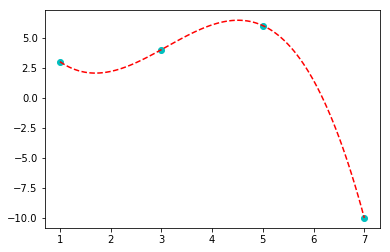

In [2]:
f = np.array([(1,3),(3,4),(5,6),(7,-10)])
mx,my = A.Lagrange_interpole(f,100)
plt.plot(f.T[0],f.T[1],'co')
plt.plot(mx,my,'r--')
plt.show()

### Asymptotic approximation

First investigate the Runge function with polynomials:

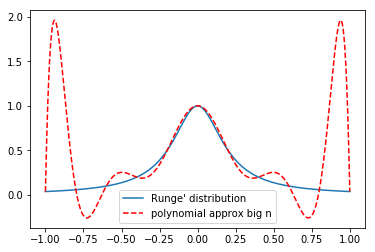

In [3]:
# Runges distribution
n = 11
X = np.linspace(-1,1,n)
Y = 1/(1+25*X**2)
f = np.column_stack((X,Y))
plt.plot(np.linspace(-1,1,100),1/(1+25*np.linspace(-1,1,100)**2),label='Runge\' distribution')
mx,my = A.Lagrange_interpole(f,1000)
plt.plot(mx,my,'r--',label='polynomial approx big n')
plt.legend()
plt.show()

=> bad approximation as n -> inf.

So, many equally spaced $x_i$ does not always make the best approximation

Better to use the distribution of x that minimize $||\omega||_{[a,b]}$

### Chebyshev polynomials

Can minimize $||\omega||_{[-1,1]}$ (for Runge function) by letting $x_i$ be the Chebyshev points:

\begin{equation}
    x_i=cos\left(\frac{\pi (2i+1)}{2(n+1)} \right)\text{ , for }i=0,1,...,n
\end{equation}

Where the Chebyshev polynomials of degree $n \geq 0$ is 
\begin{equation}
    T_n(x) = cos(n acrcos(x))
\end{equation}

Clearly have $T_0(x) = 1$  and $T_1(x) = x$, and can get $T_{n+1}(x) = 2xT_n(x)-T_{n-1}(x)$ for $n\geq 1$.

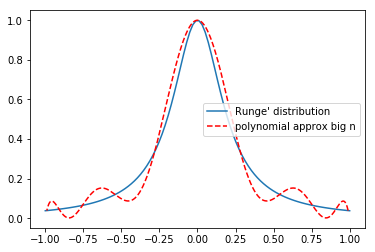

In [6]:
n = 11
X = np.array([np.cos((np.pi*(2*i + 1))/(2*(n))) for i in range(n)])
Y = 1/(1+25*X**2)
f = np.column_stack((X,Y))
plt.figure()
plt.plot(np.linspace(-1,1,100),1/(1+25*np.linspace(-1,1,100)**2),label='Runge\' distribution')
mx,my = A.Lagrange_interpole(f,1000)
plt.plot(mx,my,'r--',label='polynomial approx big n')
plt.legend()
plt.show()